# Imports

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df_tesla = pd.read_csv("TESLA Search Trend vs Price.csv")
df_btc_search = pd.read_csv("Bitcoin Search Trend.csv")
df_btc_price = pd.read_csv("Daily Bitcoin Price.csv")
df_unemployment = pd.read_csv("UE Benefits Search vs UE Rate 2004-19.csv")

# Tesla df

In [3]:
df_tesla.shape

(124, 3)

In [19]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [11]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [16]:
df_tesla.nlargest(1, "TSLA_WEB_SEARCH")["TSLA_WEB_SEARCH"].iloc[0]

31

In [18]:
df_tesla.nsmallest(1, "TSLA_WEB_SEARCH")["TSLA_WEB_SEARCH"].iloc[0]

2

In [20]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


# Unemployment df

In [21]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [22]:
df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()

100

In [68]:
df_unemployment["UNRATE"].max()

10.0

# Bitcoin Df

In [23]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [24]:
df_btc_search["BTC_NEWS_SEARCH"].max()

100

### Check for missing data

In [25]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MONTH            124 non-null    object 
 1   TSLA_WEB_SEARCH  124 non-null    int64  
 2   TSLA_USD_CLOSE   124 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB


In [26]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MONTH                   181 non-null    object 
 1   UE_BENEFITS_WEB_SEARCH  181 non-null    int64  
 2   UNRATE                  181 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.4+ KB


In [27]:
df_btc_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    2204 non-null   object 
 1   CLOSE   2203 non-null   float64
 2   VOLUME  2203 non-null   float64
dtypes: float64(2), object(1)
memory usage: 51.8+ KB


In [32]:
df_btc_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MONTH            73 non-null     object
 1   BTC_NEWS_SEARCH  73 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [33]:
df_btc_price.isna().values.sum()

2

### Drop missing data

In [35]:
df_btc_price = df_btc_price.dropna()

In [36]:
df_btc_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2203 entries, 0 to 2203
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    2203 non-null   object 
 1   CLOSE   2203 non-null   float64
 2   VOLUME  2203 non-null   float64
dtypes: float64(2), object(1)
memory usage: 68.8+ KB


## Convert date columns to date object

In [37]:
df_tesla["MONTH"] = pd.to_datetime(df_tesla["MONTH"])
df_btc_price["DATE"] = pd.to_datetime(df_btc_price["DATE"])
df_btc_search["MONTH"] = pd.to_datetime(df_btc_search["MONTH"])
df_unemployment["MONTH"] = pd.to_datetime(df_unemployment["MONTH"])

C:\Users\pc\AppData\Local\Temp\ipykernel_6180\3383845533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc_price["DATE"] = pd.to_datetime(df_btc_price["DATE"])


In [38]:
df_btc_price["DATE"].head()

0   2014-09-17
1   2014-09-18
2   2014-09-19
3   2014-09-20
4   2014-09-21
Name: DATE, dtype: datetime64[ns]

## Resample date to monthly to conform with montly prices for comparison

In [39]:
df_btc_monthly = df_btc_price.resample("M", on="DATE").last()

In [40]:
df_btc_monthly

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,3.470730e+07
2014-10-31,338.321014,1.254540e+07
2014-11-30,378.046997,9.194440e+06
2014-12-31,320.192993,1.394290e+07
2015-01-31,217.464005,2.334820e+07
...,...,...
2020-05-31,9461.058594,2.777329e+10
2020-06-30,9137.993164,1.573580e+10
2020-07-31,11323.466797,2.316047e+10


In [63]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt =mdates.DateFormatter("%Y")

### Line chart of stock price and search popularity

Text(0.5, 1.0, 'Tesla Web Search vs Price')

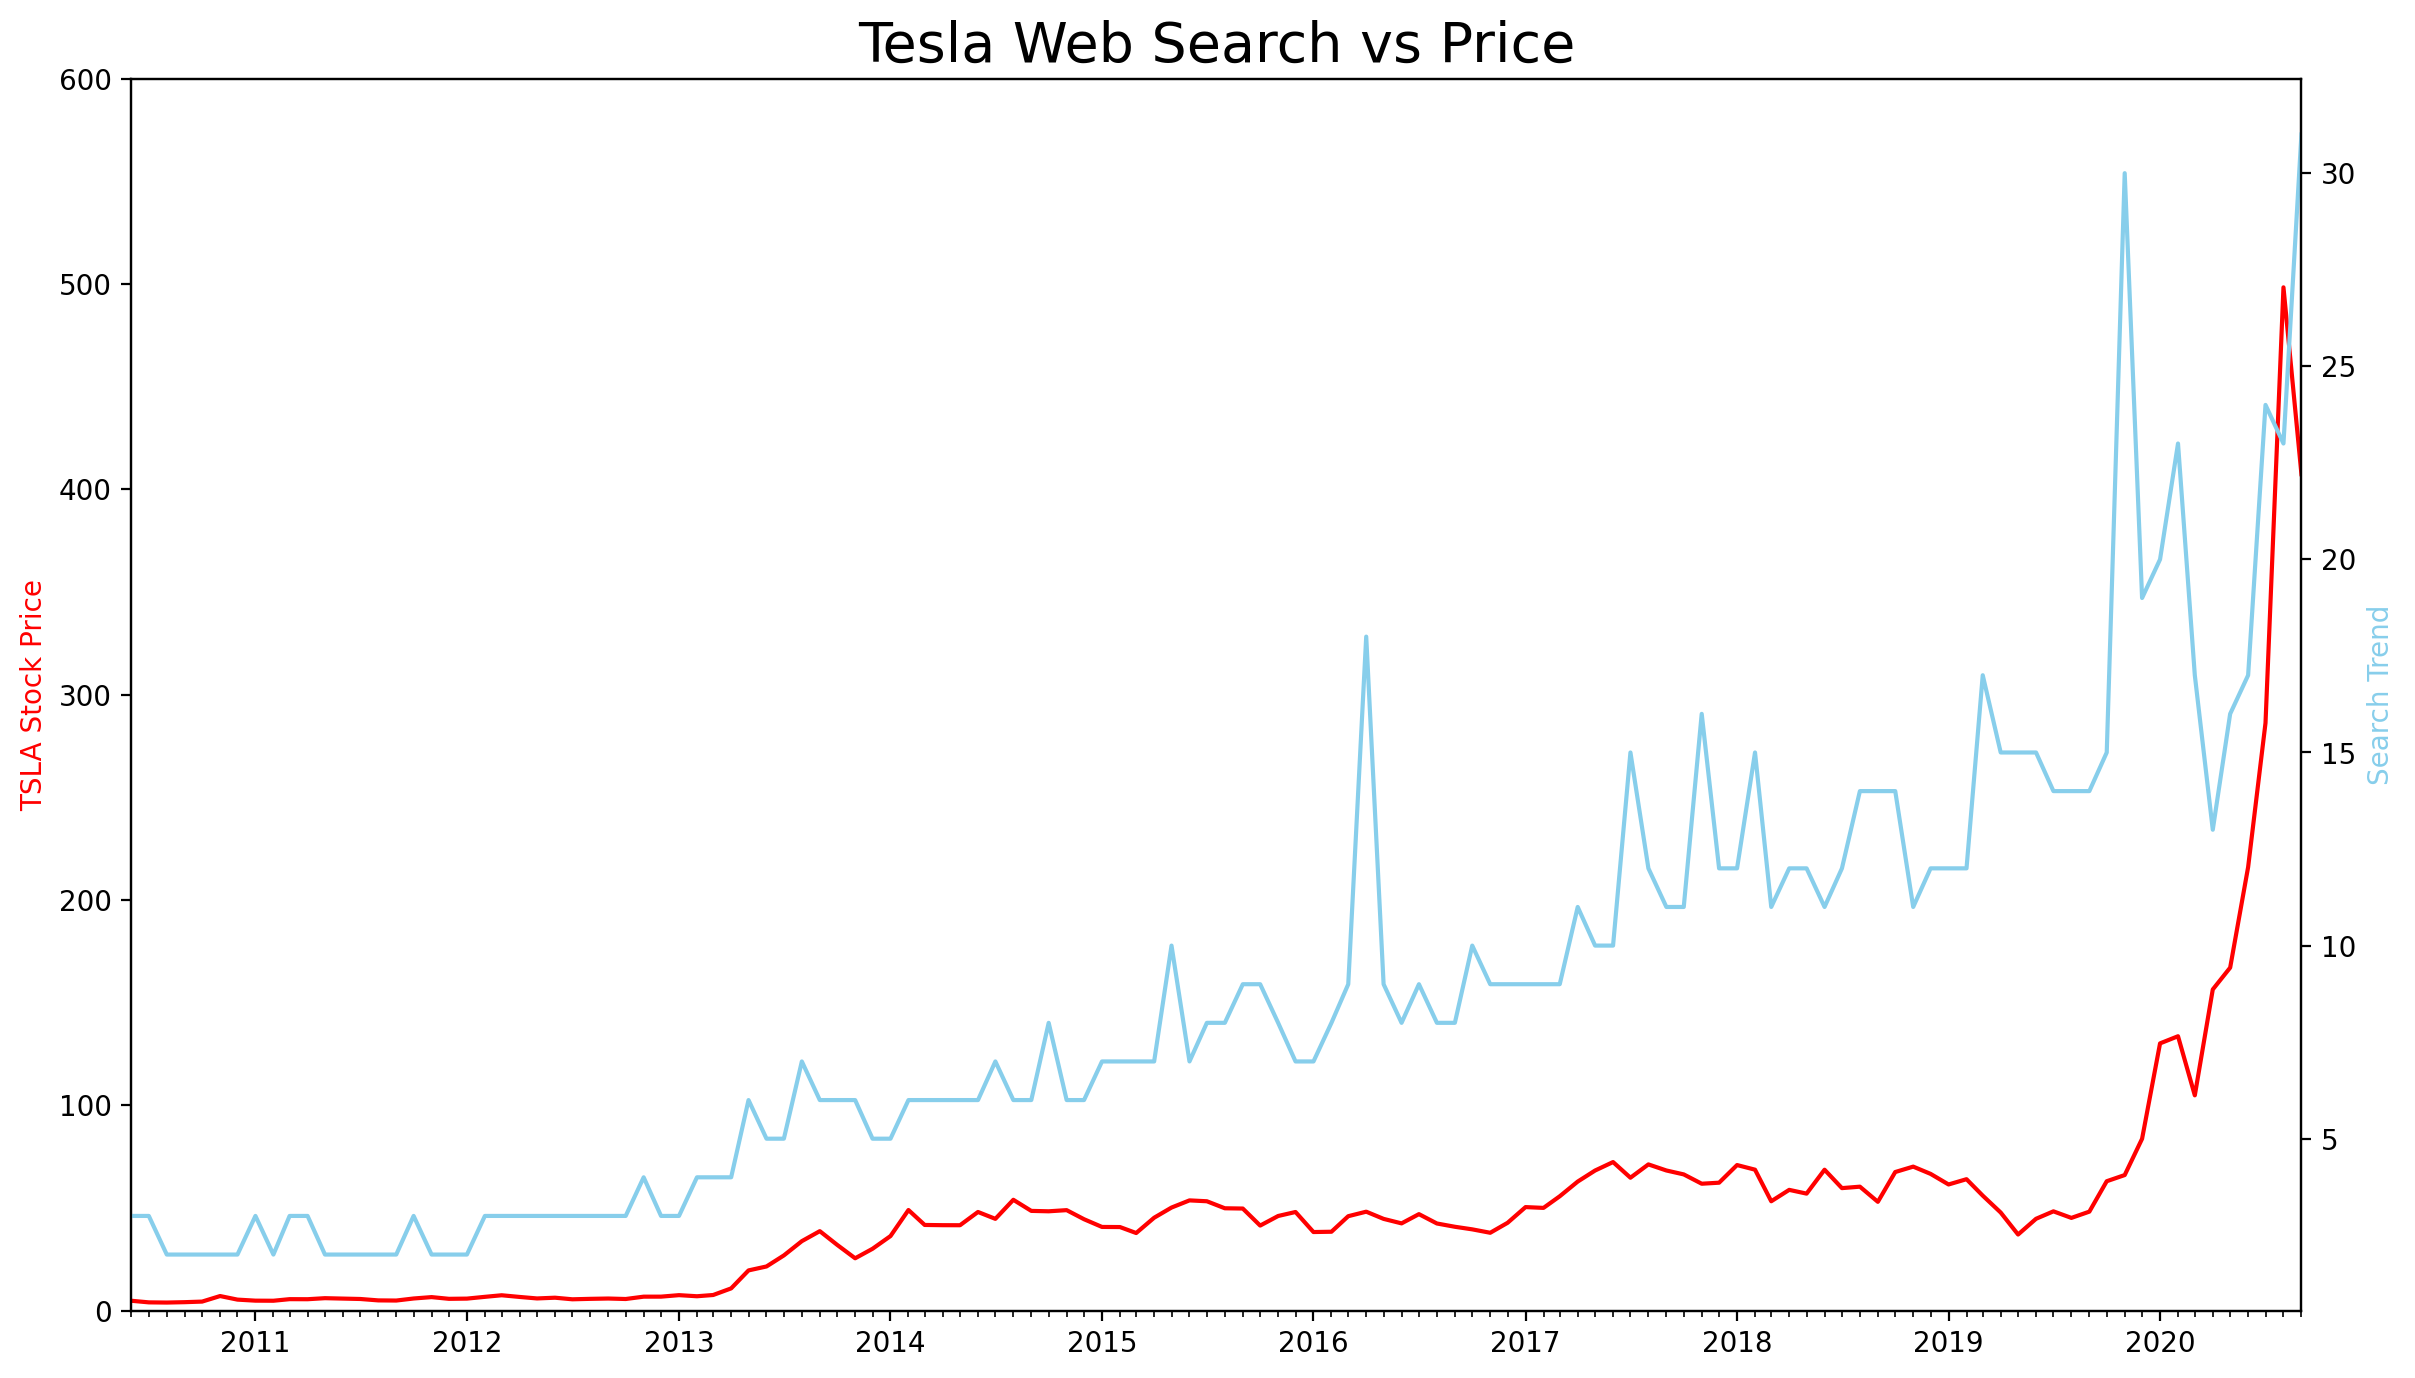

In [64]:
plt.figure(figsize=(14, 8), dpi=200)
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("TSLA Stock Price", color="red")
ax2.set_ylabel("Search Trend", color="skyblue")

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="red")
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="skyblue")
ax1.set_ylim(0, 600)
ax1.set_xlim(df_tesla.MONTH.min(), df_tesla.MONTH.max())

plt.title("Tesla Web Search vs Price", fontsize=20)

# Bitcoin Price vs Search Popularity

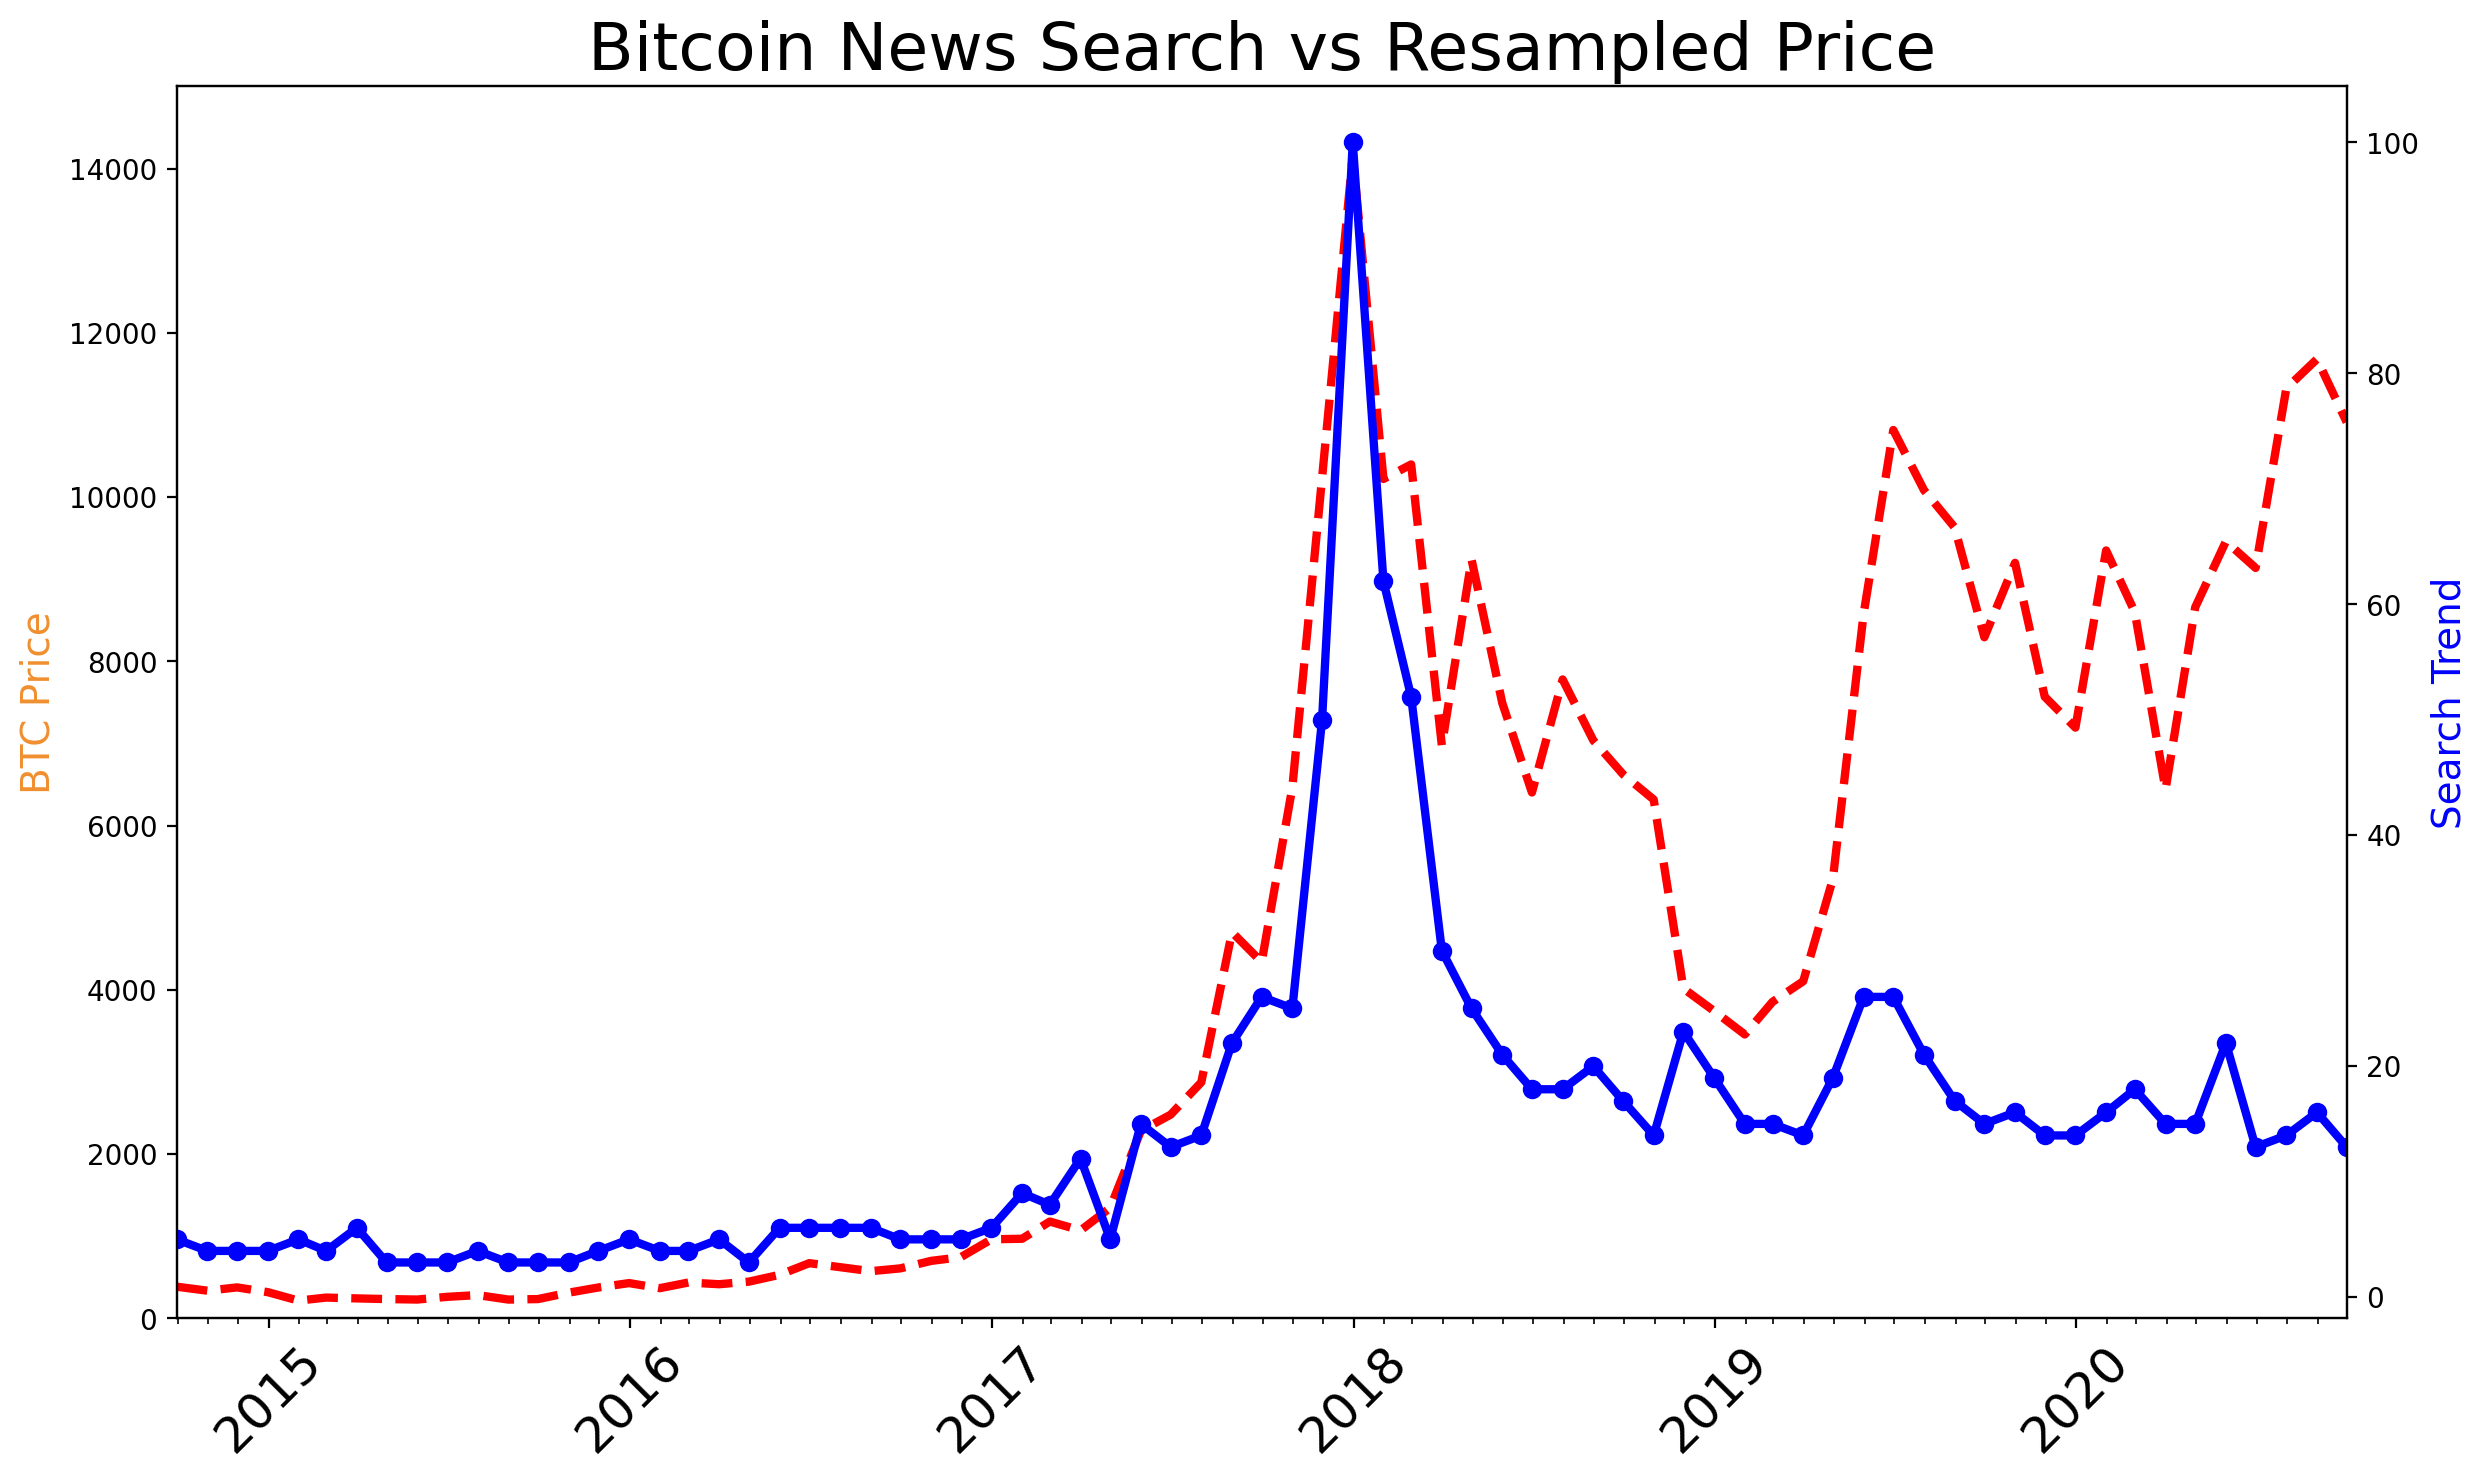

In [67]:
plt.figure(figsize=(14, 8), dpi=200)

plt.title("Bitcoin News Search vs Resampled Price", fontsize=24)
plt.xticks(fontsize=18, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("BTC Price", color="#F08F2E", fontsize=14)
ax2.set_ylabel("Search Trend", color="blue", fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(0, 15000)
ax1.set_xlim(df_btc_monthly.index.min(), df_btc_monthly.index.max())

ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, color="red", lw=3, ls="--")
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, c="blue", lw=3, marker="o");

## Unemployment Rate vs Search for 'Unemployment Benefits'

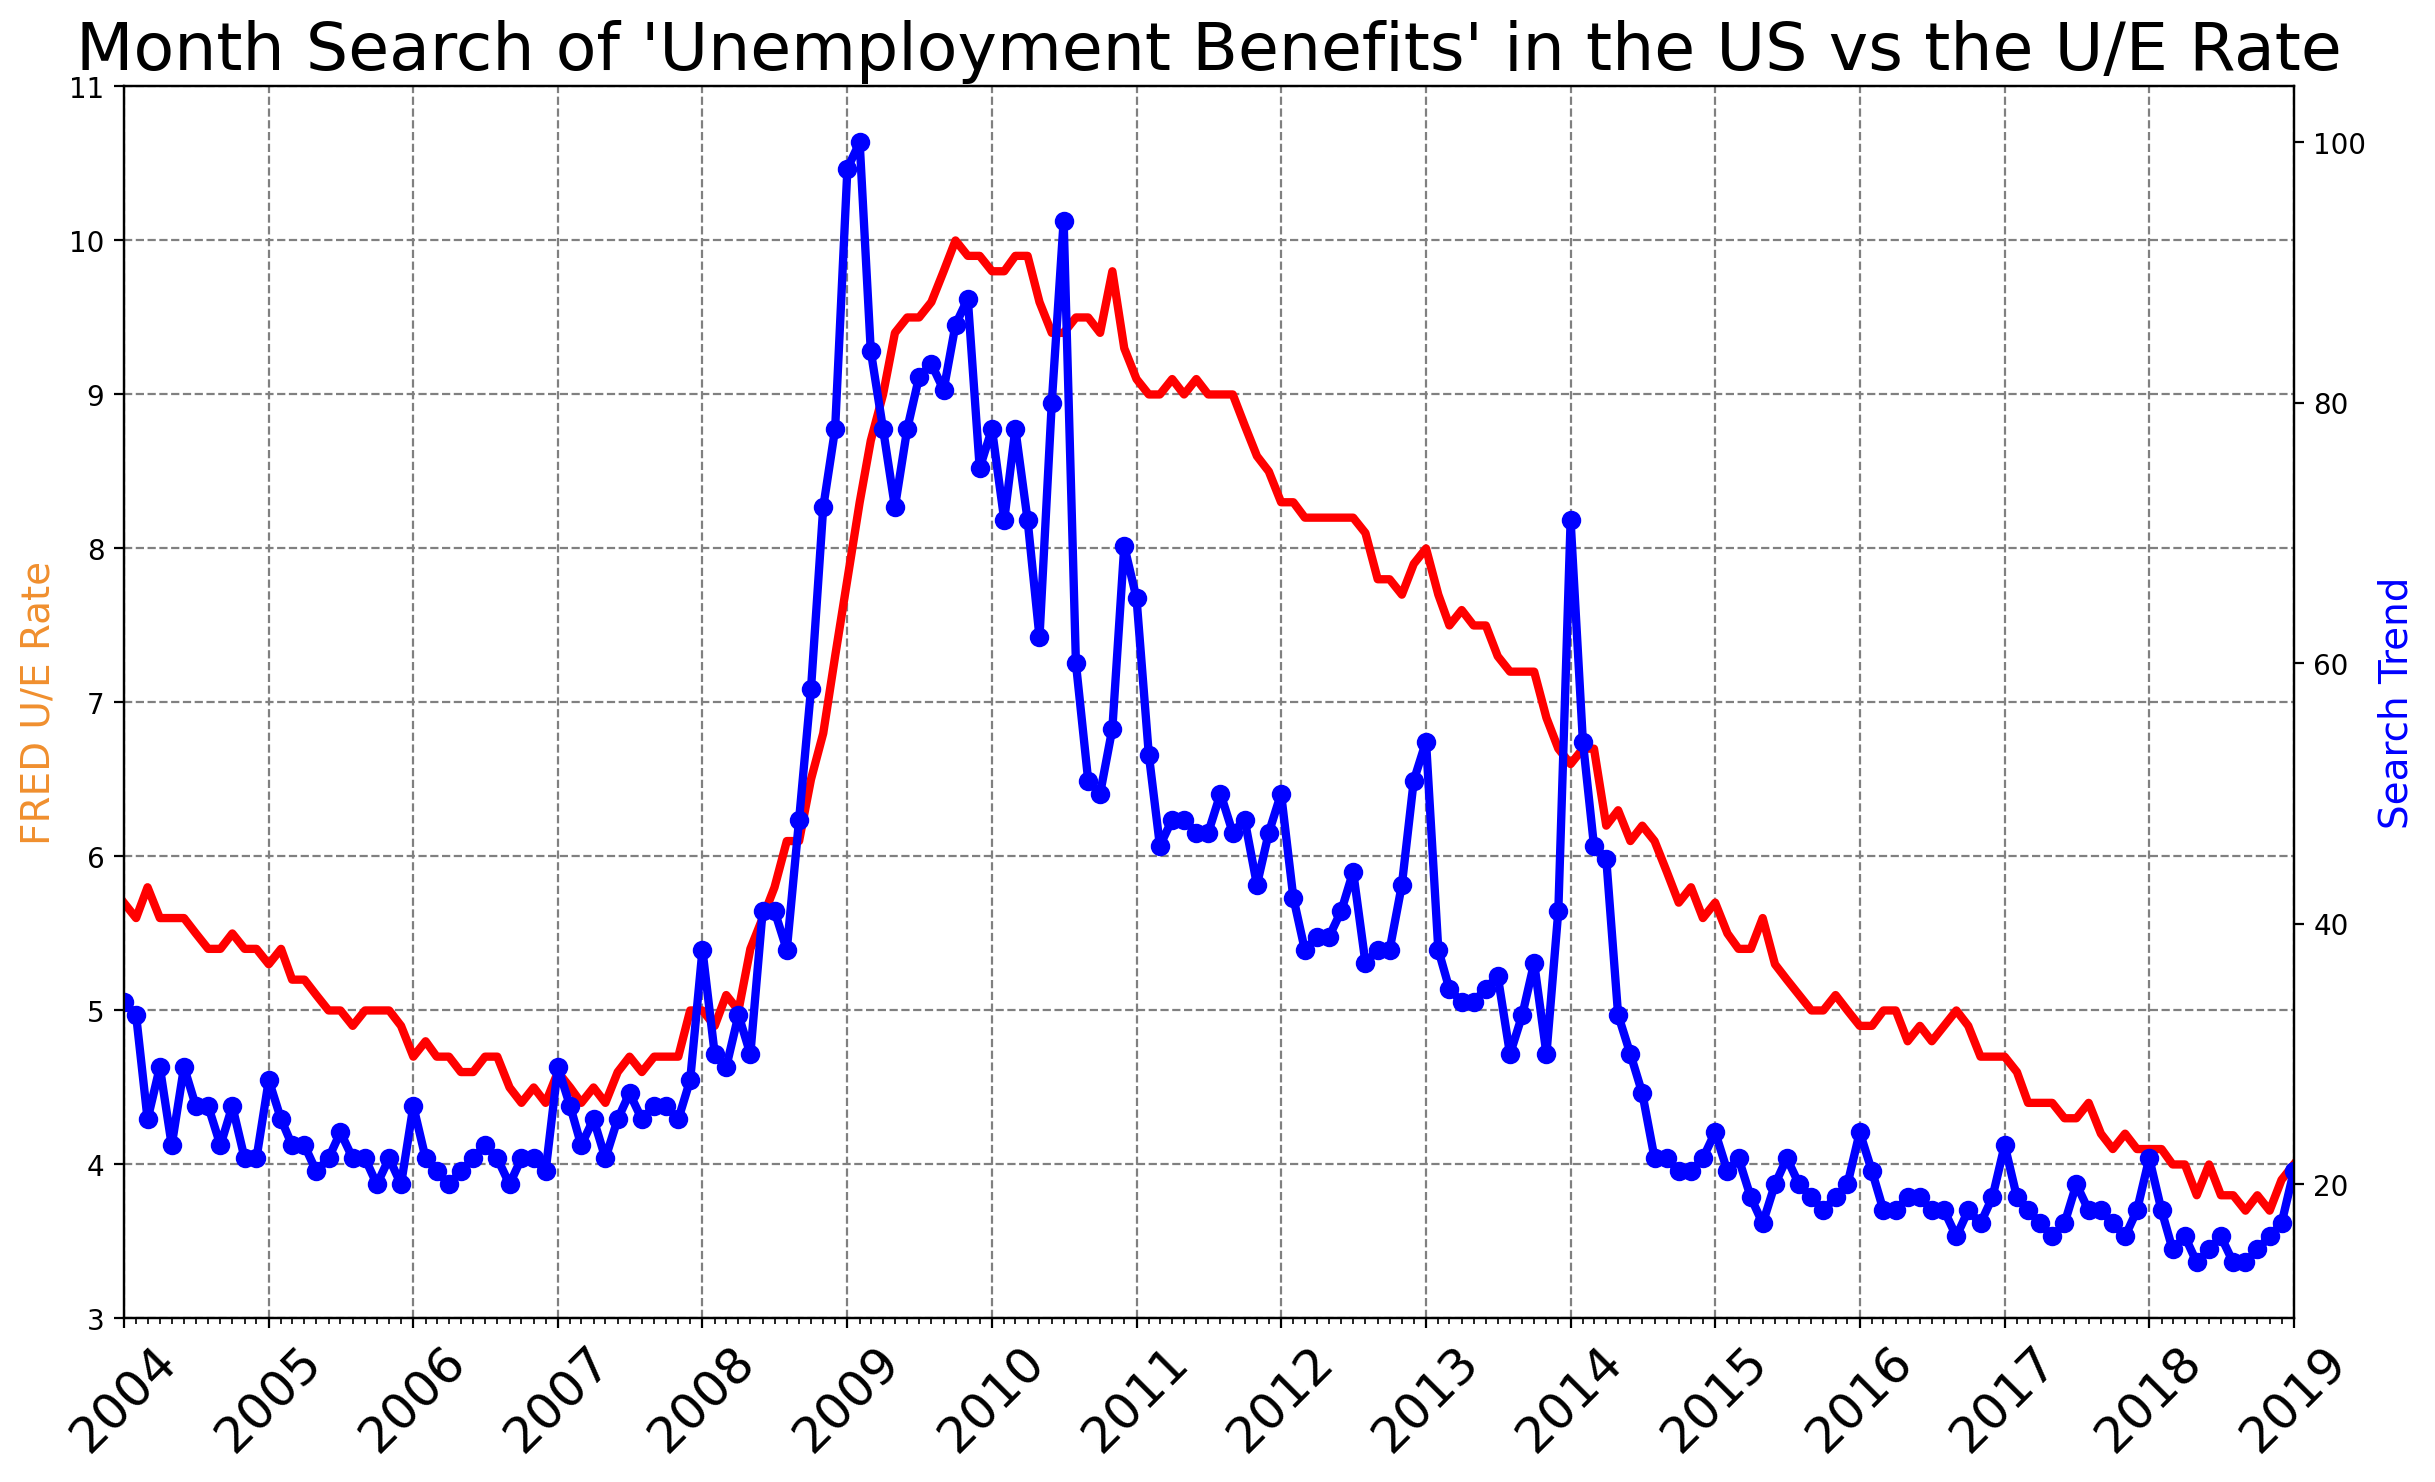

In [71]:
plt.figure(figsize=(14, 8), dpi=200)

plt.title("Month Search of 'Unemployment Benefits' in the US vs the U/E Rate", fontsize=24)
plt.xticks(fontsize=18, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("FRED U/E Rate", color="#F08F2E", fontsize=14)
ax2.set_ylabel("Search Trend", color="blue", fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(color="grey", ls="--")

ax1.set_ylim(3, 11)
ax1.set_xlim(df_unemployment.MONTH.min(), df_unemployment.MONTH.max())

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color="red", lw=3, ls="-")
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, c="blue", lw=3, marker="o");

## Rolling Average

In [72]:
roll_df = df_unemployment[["UE_BENEFITS_WEB_SEARCH", "UNRATE"]].rolling(window=6).mean()

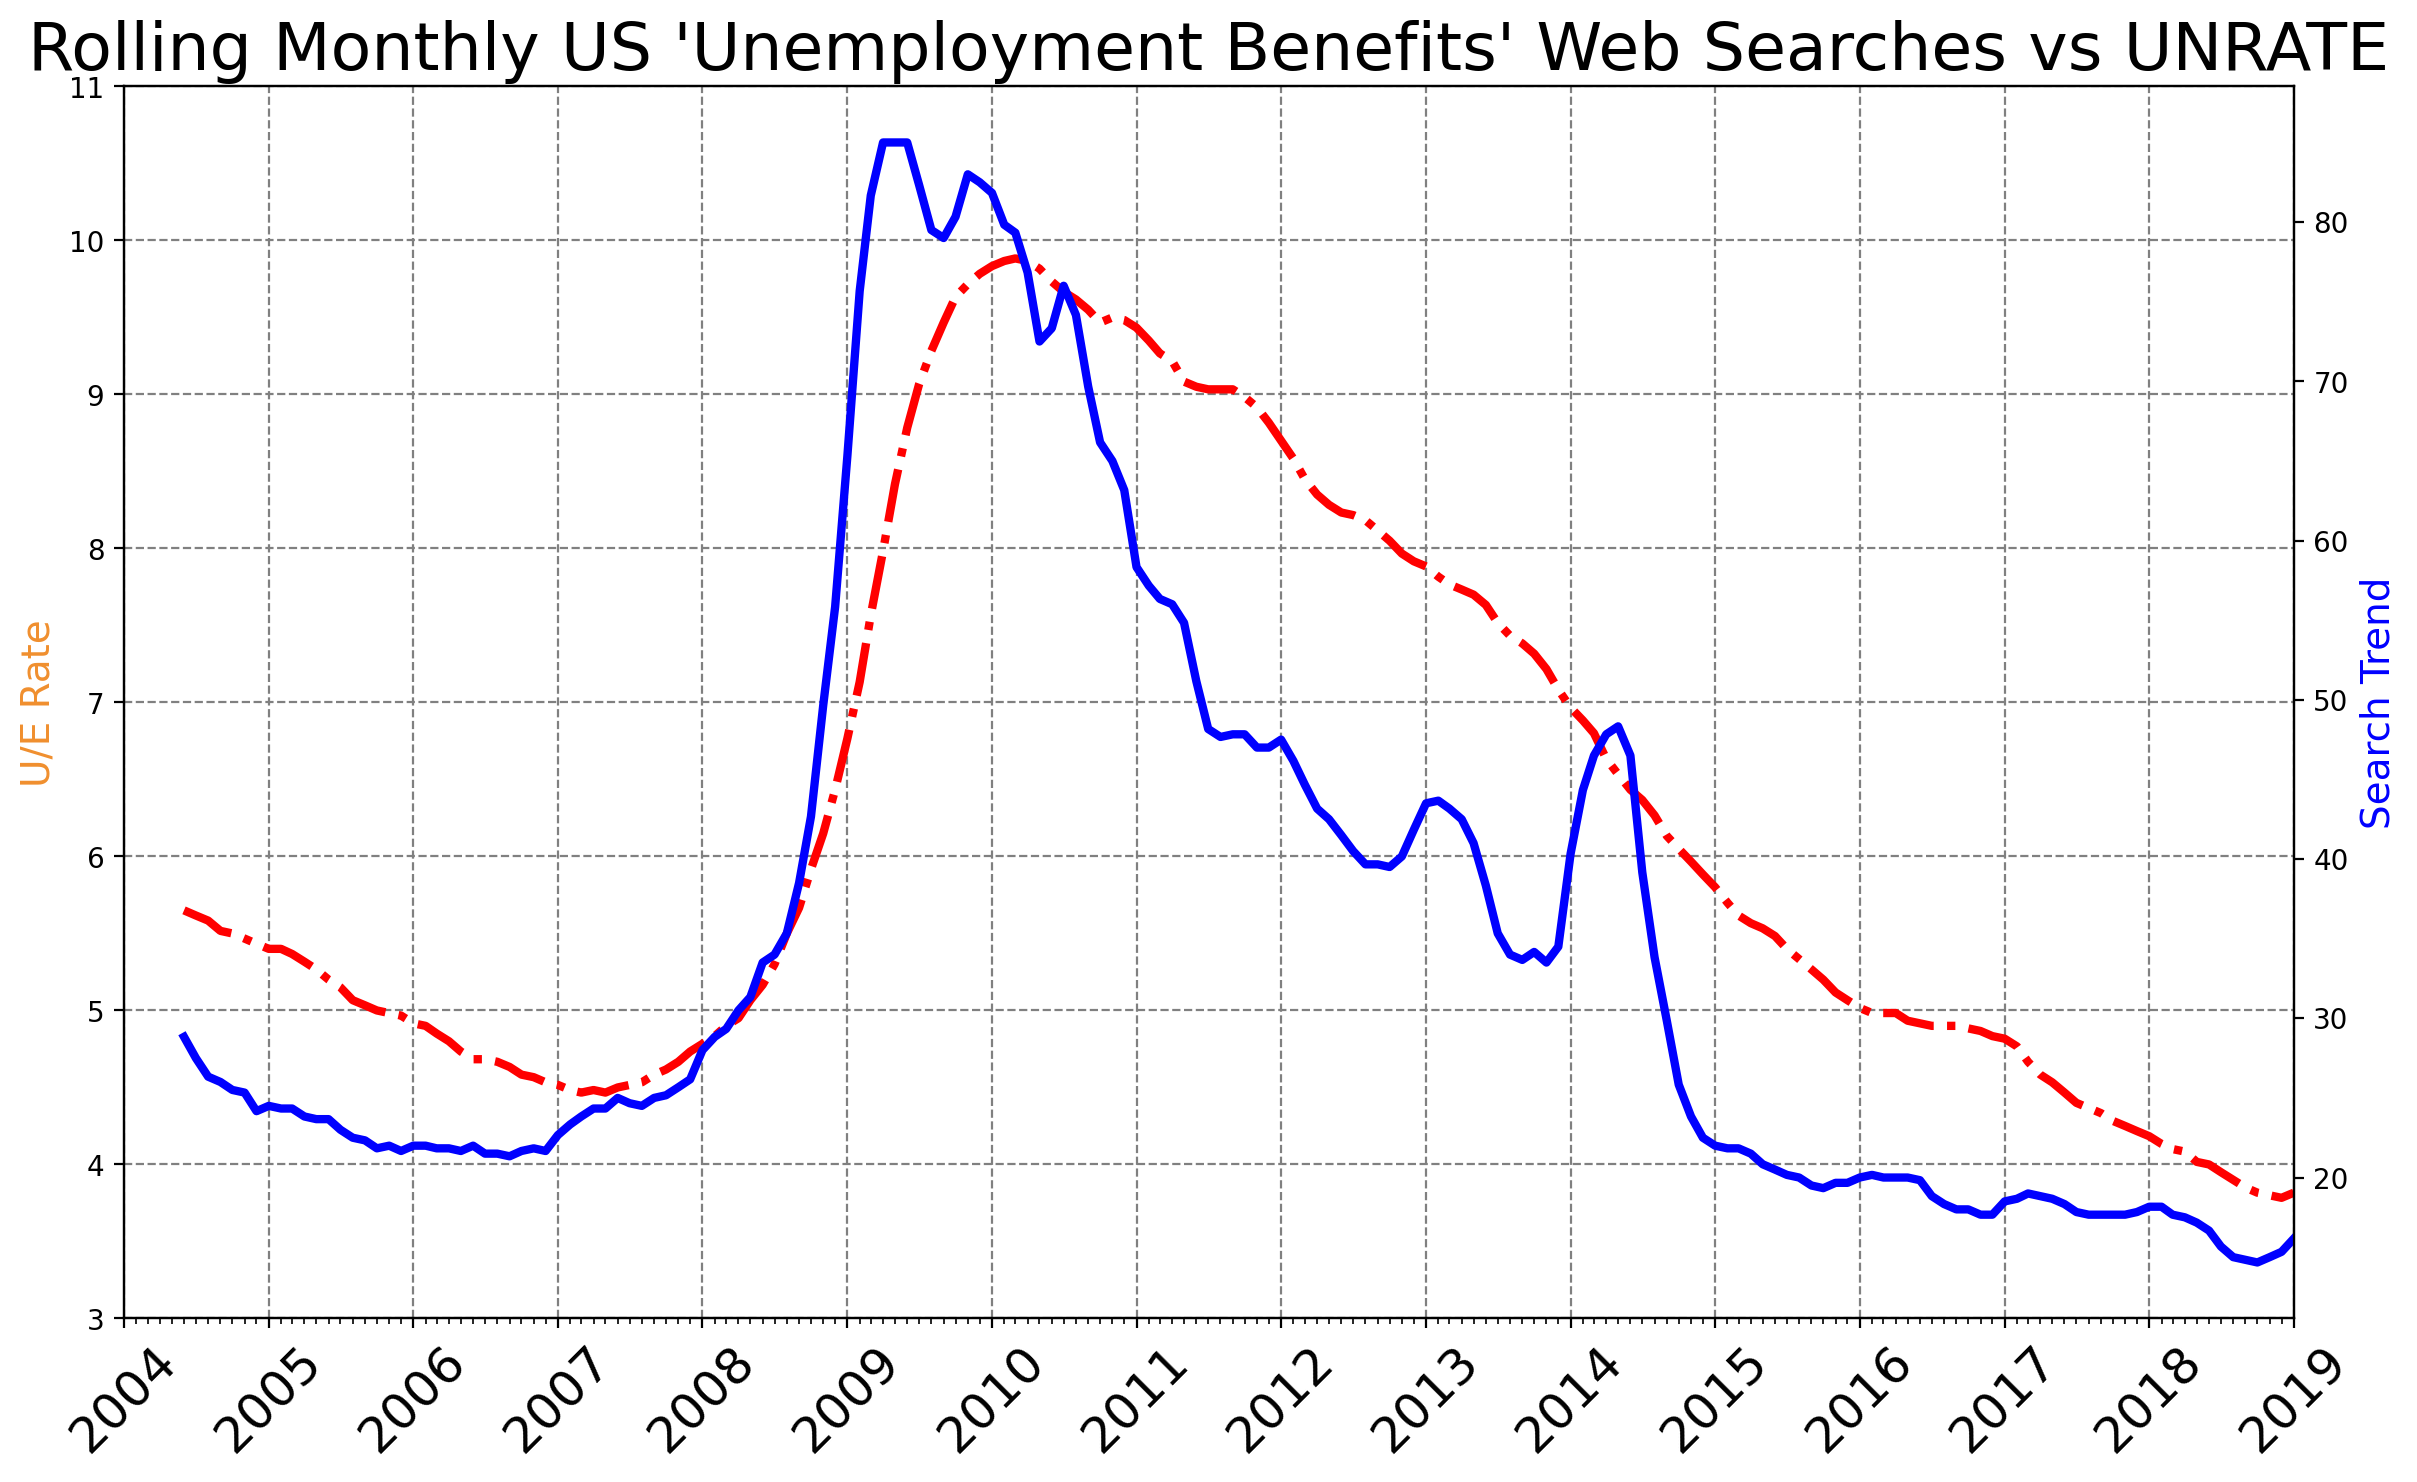

In [76]:
plt.figure(figsize=(14, 8), dpi=200)

plt.title("Rolling Monthly US 'Unemployment Benefits' Web Searches vs UNRATE", fontsize=24)
plt.xticks(fontsize=18, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("U/E Rate", color="#F08F2E", fontsize=14)
ax2.set_ylabel("Search Trend", color="blue", fontsize=14)

ax1.grid(color="grey", ls="--")

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(3, 11)
ax1.set_xlim(df_unemployment.MONTH.min(), df_unemployment.MONTH.max())

ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, color="red", lw=3, ls="-.")
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, c="blue", lw=3);